**Data Files:**  
USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv This file gives hourly electricity consumptions for a resident with unit in kw (kilowatt).  

new.app4.csv Assuming this is one appliance’s electricity consumption minute by minute which is not captured in the previous file. The unit in the file is in watt.

**Requirements:**  
for Python, use dfply package  
Create script to load both files and merge.  
Given the limitation of data period, try to find the overlap period and merge the data into hourly. (ignore the year but making sure the date/hour matched)  
After merging the source files correctly, please create one more column in the output file to give total hourly consumption of electricity. (sum all columns)  
Create plots of the data and see if there’s any abnormal in the dataset and summarize any pattern observed from the data by hourl/weekday/month  

**Hint:**  
try to show smart/efficient way to merge and sum column  
try not to hard code by column number or name but making the script re-usable for general data formatting

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from dfply import *
#pip install dfply  ## if not install

In [2]:
#the_path = "D:/Git_Desk/data_works/Guzman Project/"
the_path = "C:/Users/DanielS/Desktop/GitHub_Clone/data_works/Guzman Project/"

In [3]:
#import
df1 = pd.read_csv(the_path + "Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv")

df2 = pd.read_csv(the_path + "Assignment 2 - new.app4.csv")

In [4]:
list(df1.columns)

['Date/Time',
 'Electricity:Facility [kW](Hourly)',
 'Gas:Facility [kW](Hourly)',
 'Heating:Electricity [kW](Hourly)',
 'Heating:Gas [kW](Hourly)',
 'Cooling:Electricity [kW](Hourly)',
 'HVACFan:Fans:Electricity [kW](Hourly)',
 'Electricity:HVAC [kW](Hourly)',
 'Fans:Electricity [kW](Hourly)',
 'General:InteriorLights:Electricity [kW](Hourly)',
 'General:ExteriorLights:Electricity [kW](Hourly)',
 'Appl:InteriorEquipment:Electricity [kW](Hourly)',
 'Misc:InteriorEquipment:Electricity [kW](Hourly)',
 'Water Heater:WaterSystems:Electricity [kW](Hourly) ']

In [5]:
list(df2.columns)

['Unnamed: 0', 'time', 'W_min']

In [6]:
df1['Date/Time'] #starts from 01/01 to 12/31, length 8760 rows.

0        01/01  01:00:00
1        01/01  02:00:00
2        01/01  03:00:00
3        01/01  04:00:00
4        01/01  05:00:00
              ...       
8755     12/31  20:00:00
8756     12/31  21:00:00
8757     12/31  22:00:00
8758     12/31  23:00:00
8759     12/31  24:00:00
Name: Date/Time, Length: 8760, dtype: object

In [7]:
df2['time'] #starts from 6/7/2013 to 9/17/2013, length 10846 rows.

0         6/7/2013 11:04
1         6/7/2013 11:05
2         6/7/2013 11:06
3         6/7/2013 11:07
4         6/7/2013 11:08
              ...       
10841    9/17/2013 23:06
10842    9/17/2013 23:07
10843    9/17/2013 23:08
10844    9/17/2013 23:09
10845    9/17/2013 23:10
Name: time, Length: 10846, dtype: object

In [8]:
#data info display
df22 = df2.copy()  # Make copy

df22['time'] = pd.to_datetime(df22['time'])
# Drop the year component
df22['time'] = df22['time'].dt.strftime('%m/%d %H:%M')
df22 >> head(5)

,Unnamed: 0,time,W_min
0,1,06/07 11:04,1142.919571
1,2,06/07 11:05,371.239567
2,3,06/07 11:06,367.887333
3,4,06/07 11:07,702.714100
4,5,06/07 11:08,1655.944450


In [9]:
#double check the data accuracy
start_time = df22['time'].min()
end_time = df22['time'].max()

"""extract the dataframe timeline"""
print("Starts from: " + str(start_time) + "\nEnds at: " + str(end_time))

Starts from: 06/07 11:04
Ends at: 09/17 23:10


In [10]:
# Convert df1['Date/Time'] column to datetime
df11 = df1.copy()

#because of time 24:00, can not convert:
df11['time'] = df11['Date/Time'].str.replace('24:00:00', '00:00:00')
#turn to datetime
df11['time'] = pd.to_datetime(df11['time'], format= ' %m/%d %H:%M:%S')
# Drop the year component
df11['time'] = df11['time'].dt.strftime('%m/%d %H:%M:%S')
# Verify the data type
df11>> select(['time']) >> head(5)

,time
0,01/01 01:00:00
1,01/01 02:00:00
2,01/01 03:00:00
3,01/01 04:00:00
4,01/01 05:00:00


In [11]:
# subset overlaps from 06-07 11:04:00 to 09-17 23:10:00
df11 = df11[(df11['time'] >= start_time) & (df11['time'] <= end_time)]

# Double Check
df11 >> select(['time', 'Date/Time']) >> head(5)

,time,Date/Time
3779,06/07 12:00:00,06/07 12:00:00
3780,06/07 13:00:00,06/07 13:00:00
3781,06/07 14:00:00,06/07 14:00:00
3782,06/07 15:00:00,06/07 15:00:00
3783,06/07 16:00:00,06/07 16:00:00


In [12]:
# Group and sum the data by date, for new.app4
df22[['date', 'time']] = df22['time'].str.split(pat=' ', n=1, expand=True)
df22[['hour', 'minute']] = df22['time'].str.split(pat=':', n=1, expand=True) #split by :

In [13]:
# Group and sum the data by date and hour
df22_hour = df22.groupby(['date', 'hour'])['W_min'].sum()
# Reset index to make 'date' and 'hour' columns back to regular columns
df22_hour = df22_hour.reset_index()

#rename columns
df22_hour.rename(columns={'W_min': 'W_hour'}, inplace=True)
df22_hour >> head(5)

,date,hour,W_hour
0,06/07,11,57388.943382
1,06/07,12,27227.961318
2,06/07,13,111476.298141
3,06/07,14,109021.960420
4,06/07,15,5773.963306


In [14]:
# Concatenate date and hour
df22_hour['time'] = df22_hour['date'] + ' ' + df22_hour['hour'] + ':00:00'

# Convert the 'time' column to datetime format
df22_hour['time'] = pd.to_datetime(df22_hour['time'], format='%m/%d %H:%M:%S')
df22_hour['time'] = df22_hour['time'].dt.strftime('%m/%d %H:%M:%S')
# Drop date and hour
df22_hour.drop(['date', 'hour'], axis=1, inplace=True)

#formatting
time_column = df22_hour.pop('time')
df22_hour.insert(0, 'time', time_column)
df22_hour >> head(5)

,time,W_hour
0,06/07 11:00:00,57388.943382
1,06/07 12:00:00,27227.961318
2,06/07 13:00:00,111476.298141
3,06/07 14:00:00,109021.960420
4,06/07 15:00:00,5773.963306


**double check with calculation, 10846 data / 60 = 180hours.**  
**however dataset includes 245 hours, therefore not all of minute usages are recorded.**

In [15]:
"""Is is also reasonable to merge data by keeping all of the hours and ignore missing time"""
merged2_out = pd.merge(df22_hour, df11, on='time', how='outer')
merged2_out.drop(['Date/Time'], axis=1, inplace=True)

In [16]:
#transfer W_min to kW_min
merged2_out['kW_hour'] = merged2_out['W_hour'] / 1000
merged2_out = merged2_out >> drop(['W_hour']) 

#sum
merged2_out['Sum'] = merged2_out.drop('time', axis=1).sum(axis=1)
merged2_out >> select(['time', 'Sum']) >> head(5)

,time,Sum
0,06/07 11:00:00,57.388943
1,06/07 12:00:00,31.065016
2,06/07 13:00:00,115.828105
3,06/07 14:00:00,113.919095
4,06/07 15:00:00,11.407785


### I decide to continue with inner data since I believe the data from dataset 1 is also important while analyzing the combined energy consumption trend for this resident.

In [17]:
#merge 2 data in default
merged2 = pd.merge(df22_hour, df11, on='time')
merged2.drop(['Date/Time'], axis=1, inplace=True)

In [18]:
#transfer W_min to kW_min
merged2['kW_hour'] = merged2['W_hour'] / 1000
merged2 = merged2 >> drop(['W_hour']) 

#sum
merged2['Sum'] = merged2.drop('time', axis=1).sum(axis=1)
merged2 >> select(['time', 'Sum']) >> head(5)

,time,Sum
0,06/07 12:00:00,31.065016
1,06/07 13:00:00,115.828105
2,06/07 14:00:00,113.919095
3,06/07 15:00:00,11.407785
4,06/07 16:00:00,7.943794


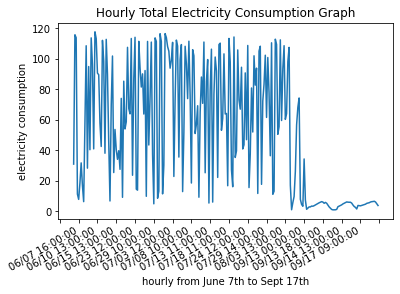

In [19]:
plt.plot(merged2['time'], merged2['Sum'])

# Format X-label
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15)) # Show ticks every x days

plt.xlabel('hourly from June 7th to Sept 17th')
plt.ylabel('electricity consumption')
plt.title('Hourly Total Electricity Consumption Graph')
plt.gcf().autofmt_xdate()

plt.show()

In [20]:
merge_day = merged2.copy()
# Group and sum the data by date, for merged2
merge_day[['date', 'hour']] = merge_day['time'].str.split(pat=' ', n=1, expand=True)
# Group and sum the data by date and hour
merge_day = merge_day.groupby(['date'])['Sum'].sum()
# Reset index
merge_day = merge_day.reset_index()
merge_day >> head(5)

,date,Sum
0,06/07,354.099464
1,06/08,289.517545
2,06/09,250.591561
3,06/10,362.839527
4,06/11,147.538744


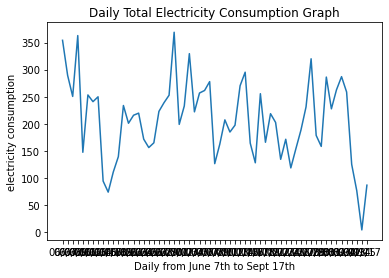

In [21]:
plt.plot(merge_day['date'], merge_day['Sum'])
plt.xlabel('Daily from June 7th to Sept 17th')
plt.ylabel('electricity consumption')
plt.title('Daily Total Electricity Consumption Graph')
plt.show()

In [22]:
merge_weekly = merge_day.copy()
# use datetime to find weeks
merge_weekly['date'] = pd.to_datetime(merge_weekly['date'], format= '%m/%d')
# Calculate cumulative week number
merge_weekly['week_num'] = merge_weekly['date'].dt.isocalendar().week
# Group and sum the data by week
merge_weekly = merge_weekly.groupby(['week_num'])['Sum'].sum()
# Reset index
merge_weekly = merge_weekly.reset_index()
#select
merge_weekly = merge_weekly >> select(['week_num', 'Sum']) 
merge_weekly >> head(5)

,week_num,Sum
0,23,1257.048097
1,24,1060.151144
2,25,1121.123726
3,26,1576.777892
4,27,1779.986187


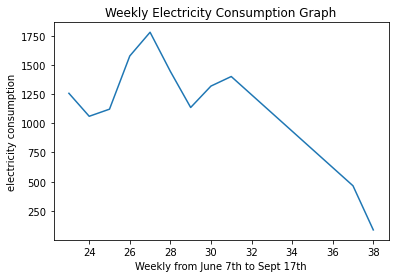

In [23]:
plt.plot(merge_weekly['week_num'], merge_weekly['Sum'])
plt.xlabel('Weekly from June 7th to Sept 17th')
plt.ylabel('electricity consumption')
plt.title('Weekly Electricity Consumption Graph')
plt.show()

In [24]:
merge_Month = merge_day.copy()
# Group and sum the data by date, for merged2
merge_Month[['month', 'date']] = merge_day['date'].str.split(pat='/', n=1, expand=True)
# Group and sum the data by date and hour
merge_Month = merge_Month.groupby(['month'])['Sum'].sum()
# Reset index
merge_Month = merge_Month.reset_index()
merge_Month >> head(5)

,month,Sum
0,06,4646.109817
1,07,6384.893747
2,08,1063.754975
3,09,551.780369


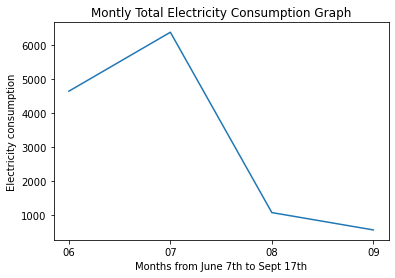

In [25]:
plt.plot(merge_Month['month'], merge_Month['Sum'])
plt.xlabel('Months from June 7th to Sept 17th')
plt.ylabel('Electricity consumption')
plt.title('Montly Total Electricity Consumption Graph')
plt.show()

As the graph shows, the New appliance’s electricity consumption

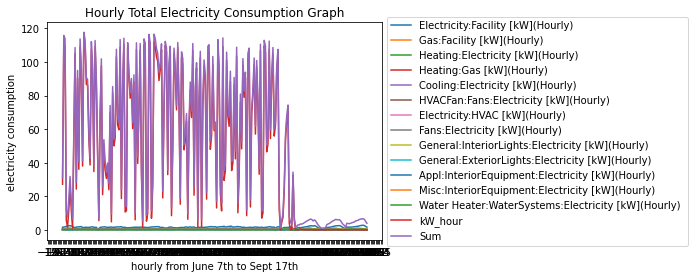

In [26]:
ax = merged2.plot()

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show ticks every x days
plt.xlabel('hourly from June 7th to Sept 17th')
plt.ylabel('electricity consumption')
plt.title('Hourly Total Electricity Consumption Graph')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend to top right

plt.show()